# Portfolio Optimization with Efficient Frontier

This notebook demonstrates the process of portfolio optimization using quadratic programming. It utilizes Python libraries such as NumPy, Matplotlib, and CVXOPT to calculate and visualize the efficient frontier for a portfolio of three assets. The workflow includes:

- Defining expected returns and the covariance matrix for the assets.
- Setting up and solving the quadratic programming problem to find the optimal asset weights for a given target return.
- Calculating the expected return and risk (standard deviation) of the optimized portfolio.
- Generating and plotting the efficient frontier, along with the individual assets and the minimum variance portfolio.

This notebook provides a practical example of modern portfolio theory and the trade-off between risk and return.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from cvxopt import matrix, solvers
from numpy import c_


In [3]:
rho = matrix([[4.27,.15,2.85]])

In [4]:
print(rho)

[ 4.27e+00]
[ 1.50e-01]
[ 2.85e+00]



In [5]:
cov_mat = matrix([[0.99,0.18,0.11],[0.18,1.09,0.26], [0.11,0.26,1.99]])

In [6]:
print(cov_mat)

[ 9.90e-01  1.80e-01  1.10e-01]
[ 1.80e-01  1.09e+00  2.60e-01]
[ 1.10e-01  2.60e-01  1.99e+00]



In [7]:
n=len(rho)
print(n)

3


In [8]:
A = matrix(np.c_[np.ones(n), rho]).T
print(A)

[ 1.00e+00  1.00e+00  1.00e+00]
[ 4.27e+00  1.50e-01  2.85e+00]



In [9]:
b = matrix(np.c_[np.ones(1),rho[0]]).T
print(b)

[ 1.00e+00]
[ 4.27e+00]



In [1]:
q = matrix(np.zeros((n, 1)))
sol = solvers.qp(cov_mat,q, A=A, b=b)

NameError: name 'matrix' is not defined

In [ ]:
print(sol['x'])

In [12]:
exp_rets = (np.matmul(sol['x'].T,rho))
print(exp_rets)

[[4.27]]


In [13]:
risk = np.sqrt((np.matmul(np.matmul(sol['x'].T,cov_mat),sol['x'])))
print(risk)
print(cov_mat[0,0], risk*risk)

[[0.91281036]]
0.99 [[0.83322274]]


In [14]:
risk = np.sqrt((sol['x'].T)*cov_mat*sol['x'])
print(risk)

[[0.91281036]]


In [15]:
eff_front_rets = np.linspace(1,8,200)
eff_front_risk = np.linspace(0,0,200)
for i in range(0,200):
    target_l = eff_front_rets[i]
    b = matrix(np.c_[np.ones(1),target_l]).T
    sol1 = solvers.qp(cov_mat,q, A=A, b=b) 
    eff_front_risk[i] = np.sqrt((sol1['x'].T)*cov_mat*sol1['x'])

C:\Users\bjorn\AppData\Local\Temp\ipykernel_24812\2271797297.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot([np.sqrt(10)], rho[0], 'ro', color='blue', label='Microsoft')
C:\Users\bjorn\AppData\Local\Temp\ipykernel_24812\2271797297.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot([np.sqrt(11)], rho[1], 'ro', color='green', label='Nordstrom')
C:\Users\bjorn\AppData\Local\Temp\ipykernel_24812\2271797297.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot([np.sqrt(20)], rho[2], 'ro', color='orange', label='Starbucks')
C:\Users\bjorn\AppData\Local\Temp\ipykernel_24812\2271797297.py:9: UserWarning: color is redundantly defin

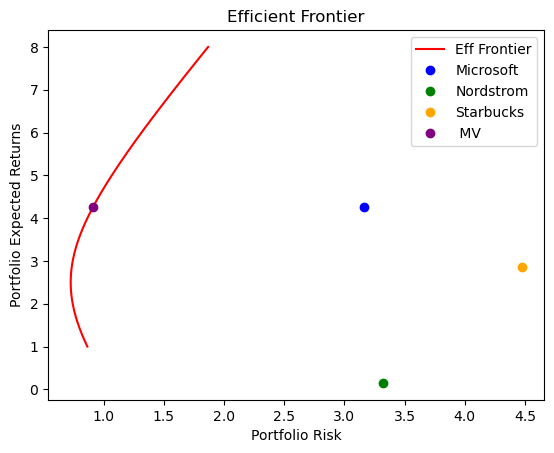

In [16]:
#plotting the efficent frontier along with the 3 individual stocks
plt.xlabel("Portfolio Risk")
plt.ylabel("Portfolio Expected Returns")
plt.title("Efficient Frontier")
plt.plot(eff_front_risk,eff_front_rets, color='red',label="Eff Frontier") 
plt.plot([np.sqrt(10)], rho[0], 'ro', color='blue', label='Microsoft') 
plt.plot([np.sqrt(11)], rho[1], 'ro', color='green', label='Nordstrom') 
plt.plot([np.sqrt(20)], rho[2], 'ro', color='orange', label='Starbucks')
plt.plot(risk, rho[0], 'ro', color='purple', label=' MV')
plt.legend()
plt.show()